## Project Overview

For my Bank Loan Approval project, I aimed to predict whether a customer would be approved for a personal loan based on a dataset with 5,000 records and 14 features, such as Age, Income, CCAvg (average credit card spending), Education, and binary indicators like Securities.Account and Online. The target variable was Personal.Loan (0 = not approved, 1 = approved), making this a binary classification task. My goal was to preprocess the data, train a Logistic Regression model, and address class imbalance, which initially caused the model to overfit to the majority class (non-approvals). This project was exciting but challenging due to the imbalanced dataset, and it taught me the importance of evaluating multiple metrics beyond accuracy.


**Purpose:** To predict personal loan approval using classification models and improve performance by addressing class imbalance.

### Objectives:

- Load and explore the dataset to understand its structure and feature distributions.

- Preprocess the data by dropping irrelevant features, scaling, and splitting into training and test sets.

- Train a Logistic Regression model and evaluate its performance.

- Identify and correct class imbalance using techniques like SMOTE or oversampling.

- Visualize model performance with ROC curves, confusion matrices, and feature importance.

- Plan future improvements with advanced models (e.g., Random Forest, XGBoost) and feature engineering.

**Technologies Used:** Python, Jupyter Notebook, Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Imbalanced-learn, Category Encoders, Plotly

## Library Imports

I started by importing the libraries needed for data manipulation, visualization, preprocessing, modeling, and handling class imbalance.

 I used pandas and numpy for data handling, matplotlib, seaborn, and plotly for visualizations, and scikit-learn for preprocessing (StandardScaler, train_test_split), modeling (LogisticRegression), and evaluation (accuracy_score, precision_score, etc.). The imblearn library provided tools like SMOTE and RandomOverSampler for class imbalance correction. I set warnings.filterwarnings('ignore') to suppress non-critical warnings and %matplotlib inline to display plots in the notebook.

 These libraries are standard for classification tasks. I included imblearn after realizing the dataset was imbalanced. The category_encoders import was unused but kept for potential future encoding of categorical features.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from category_encoders import BinaryEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from IPython.core.interactiveshell import InteractiveShell
from sklearn.utils.class_weight import compute_class_weight
InteractiveShell.ast_node_interactivity = "last_expr" 
%matplotlib inline

### Data Loading and Exploratory Data Analysis (EDA)

I loaded the dataset and explored its structure to understand the features and target.

I loaded bankloan.csv into a Pandas DataFrame (data). The info() method showed 5,000 rows, 14 columns, and no missing values. Features included:

 Age (int64), Experience (int64), Income (int64), ZIP.Code (int64), Family (int64), CCAvg (float64), Education (int64, ordinal: 1=Undergrad, 2=Graduate, 3=Advanced), Mortgage (int64).

 Personal.Loan (int64, target: 0=not approved, 1=approved), Securities.Account (int64), CD.Account (int64), Online (int64), CreditCard (int64).

Identifier: ID (int64). The dataset preview showed varied Income (11–224), CCAvg (0.3–10), and sparse Mortgage values (mostly 0).

 EDA confirmed no missing values, simplifying preprocessing. The binary target (Personal.Loan) suggested a classification task, similar to my Cancer Classification project. I suspected class imbalance in Personal.Loan based on typical bank loan datasets (~90% non-approvals), which I later verified.



In [2]:
data = pd.read_csv('bankloan.csv')
data

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
dataInfo = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Data Cleaning

I dropped irrelevant features to streamline the dataset.

 I removed ID (unique identifier) and ZIP.Code (geographic, but too many unique values for meaningful encoding without external data), reducing the dataset to 12 features.

 Dropping irrelevant features reduced noise, similar to my Cancer Classification project where I removed non-predictive columns. I considered encoding ZIP.Code but lacked context (e.g., mapping to regions), so I excluded it.

In [5]:
data = data.drop(['ID', 'ZIP.Code'], axis = 1)

In [6]:
data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [7]:
data.nunique()

Age                    45
Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal.Loan           2
Securities.Account      2
CD.Account              2
Online                  2
CreditCard              2
dtype: int64

In [8]:
data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


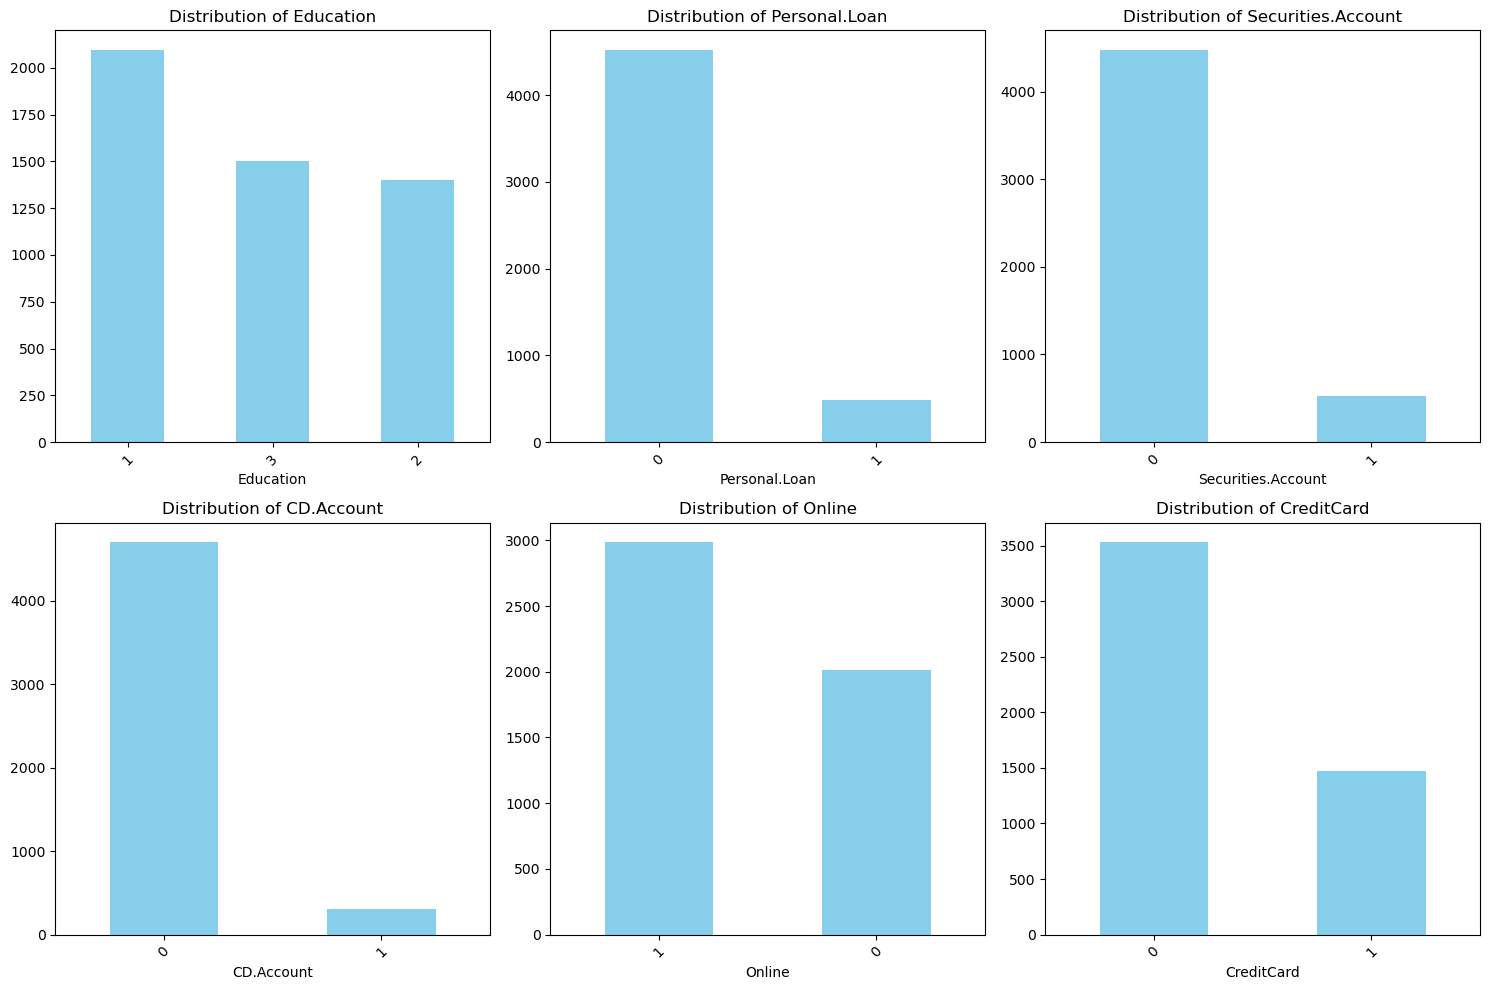

In [9]:
features1 = ['Education', 'Personal.Loan', 'Securities.Account', 
               'CD.Account', 'Online', 'CreditCard']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features1, 1):
    plt.subplot(2, 3, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

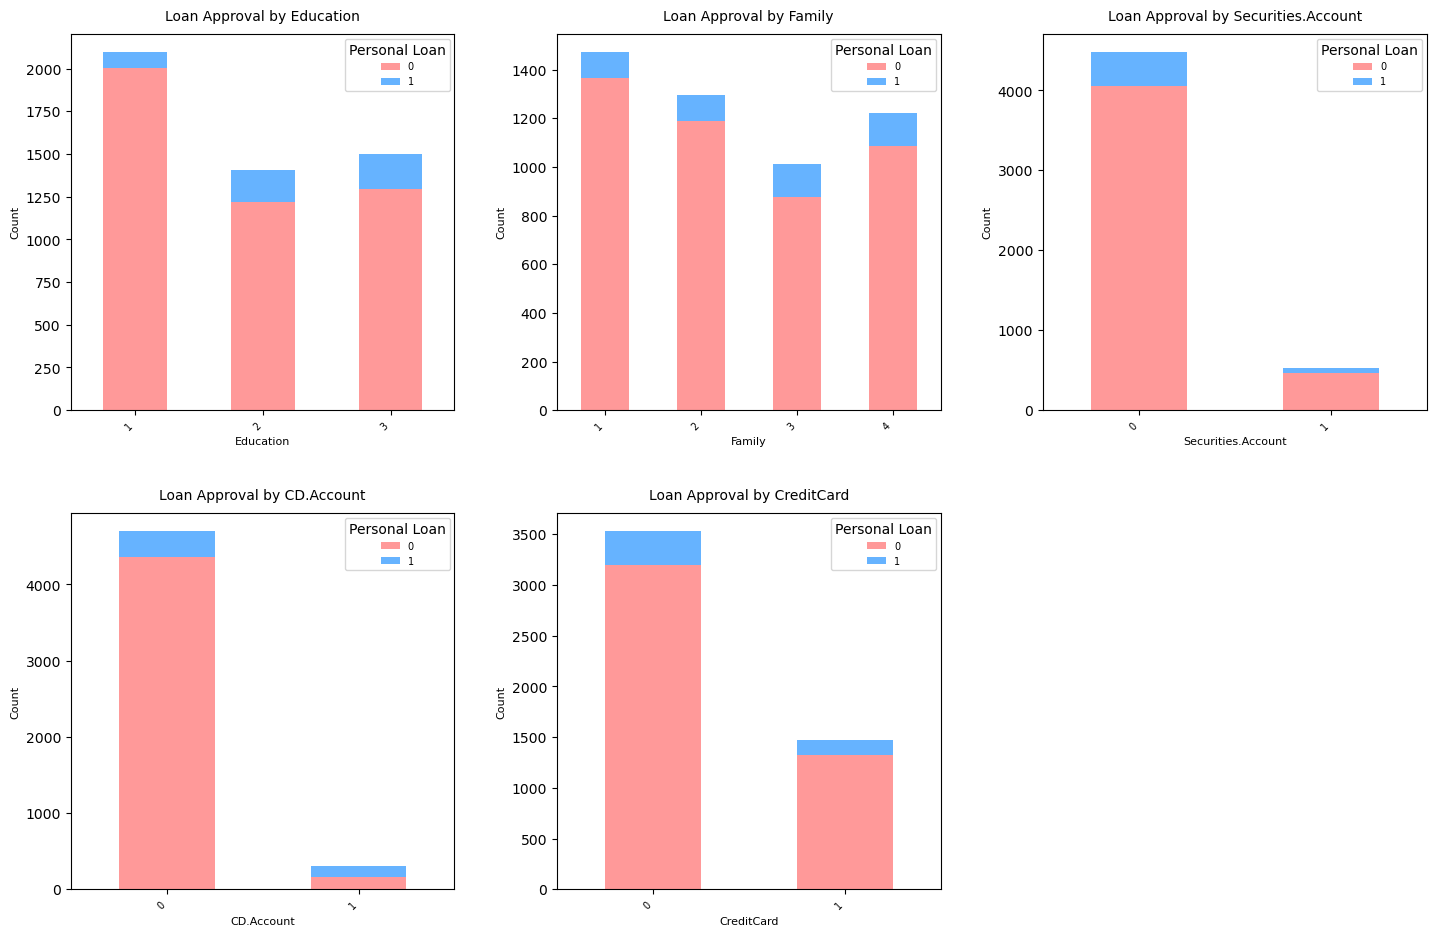

In [10]:
features2 = ['Education', 'Family', 'Securities.Account', 'CD.Account', 'CreditCard']

try:
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Error: 'data' must be a pandas DataFrame")
    if 'Personal.Loan' not in data.columns:
        raise ValueError("Error: 'Personal.Loan' column not found in data")
    if not features2:
        raise ValueError("Error: 'features2' is empty")
    
    # Create figure with adjusted size
    plt.figure(figsize=(15, 10))

    
    for i, col in enumerate(features2[:5], 1):  
        try:
            plt.subplot(2, 3, i)  
            # Compute crosstab and plot
            crosstab = pd.crosstab(data[col], data['Personal.Loan'])
            crosstab.plot(
                kind='bar', 
                stacked=True, 
                color=['#ff9999', '#66b3ff'],
                ax=plt.gca()  # Use current axis
            )
            plt.title(f'Loan Approval by {col}', fontsize=10, pad=10)
            plt.xlabel(col, fontsize=8)
            plt.ylabel('Count', fontsize=8)
            plt.xticks(rotation=45, ha='right', fontsize=7)
            plt.legend(title='Personal Loan', fontsize=7, loc='upper right')
        except Exception as e:
            print(f"Error plotting {col}: {str(e)}")
            continue

    plt.tight_layout(pad=3.0)  # Extra padding
    plt.show()

except Exception as e:
    print(f"Error in setup: {str(e)}")

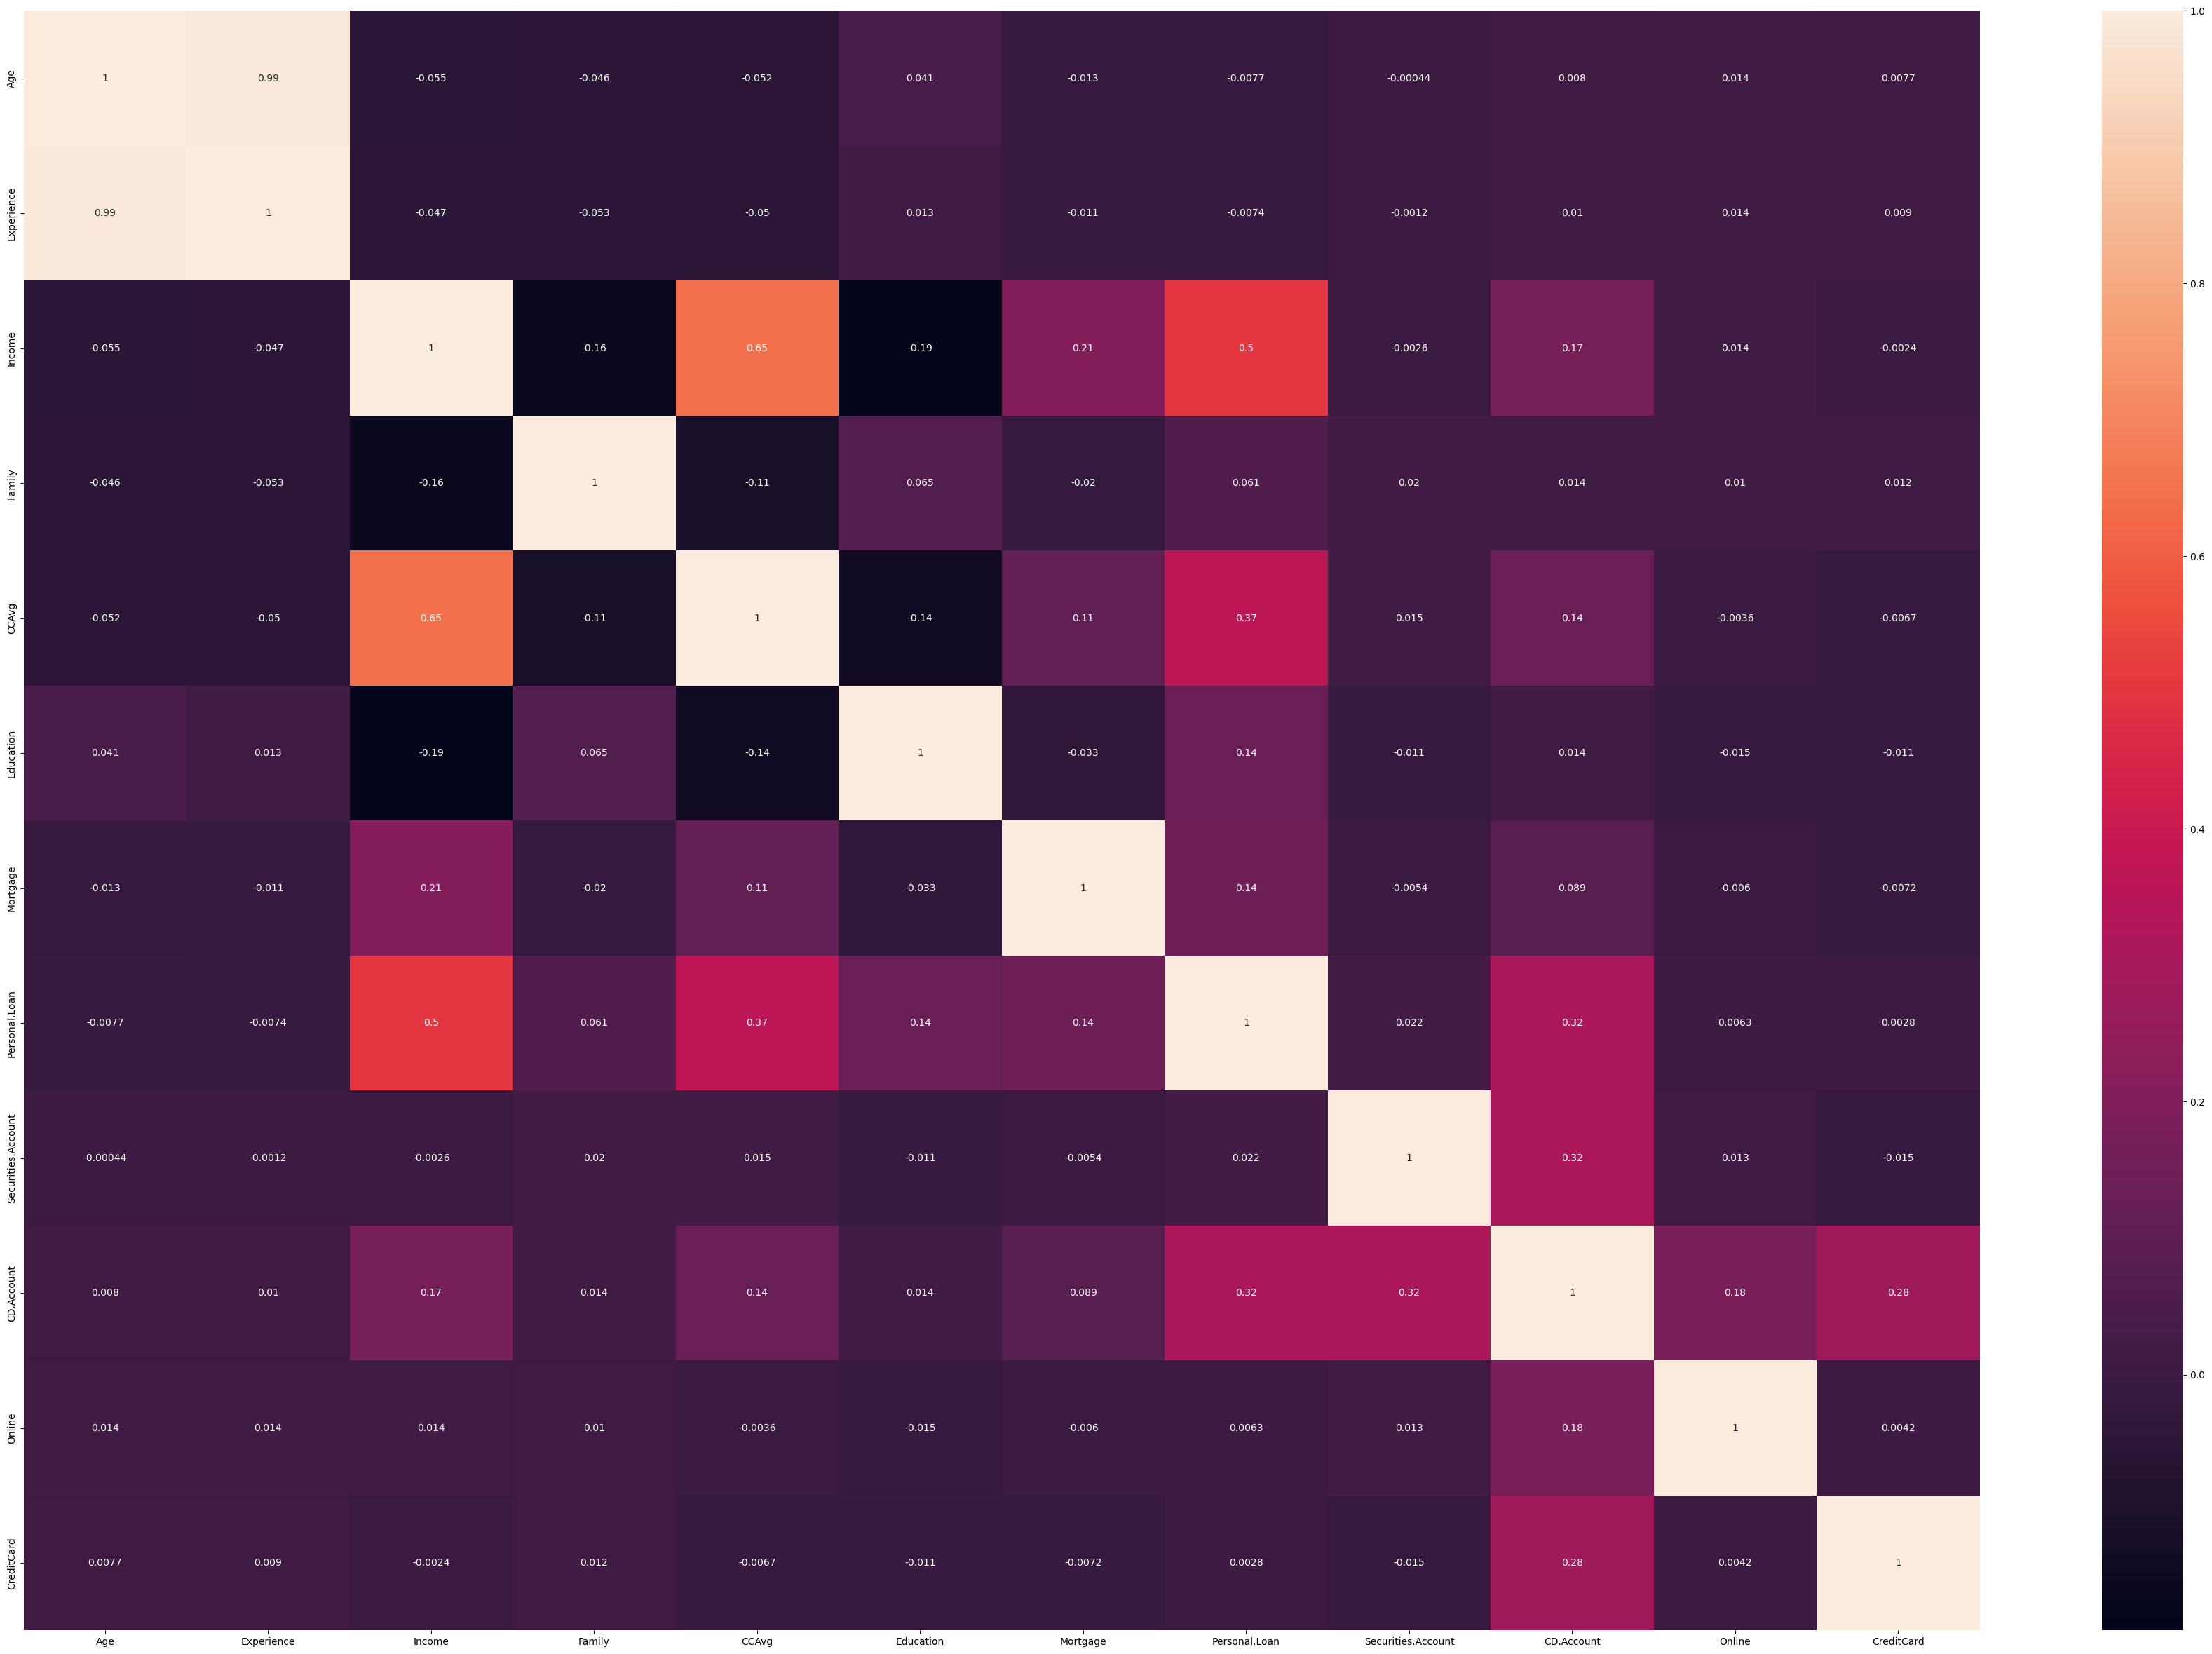

In [11]:
heat_map = data.corr()
plt.figure(figsize = (45, 30))
sns.heatmap(heat_map, annot = True)
plt.show()

In [12]:
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

In [13]:
train_set

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
4227,32,7,111,1,3.8,1,0,0,1,0,0,0
4676,39,13,68,3,2.1,1,0,0,1,0,1,0
800,31,7,173,1,6.0,1,0,0,0,0,1,0
3671,50,25,18,1,0.4,3,0,0,0,0,1,0
4193,62,37,31,3,0.2,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,33,8,140,1,4.6,1,0,0,0,0,1,0
466,25,0,13,2,0.9,3,0,0,0,0,1,0
3092,43,18,113,2,0.4,1,325,0,1,0,0,0
3772,35,10,152,2,3.0,1,0,0,0,0,1,0


In [14]:
def prepare_features_and_target(train_df, test_df, target_column, columns_to_drop=None, scale_features=True):
    """
    Parameters:
    - train_df, test_df: Pre-split DataFrames
    - target_column: Name of target column
    - columns_to_drop: List of columns to remove (e.g., ['ID'])
    - scale_features: Whether to scale features (default: True)
    
    Returns:
    - Processed X_train, X_test
    - y_train, y_test
    - scaler object (or None)
    """
    
    # Create copies to avoid modifying original DataFrames
    train_df = train_df.copy()
    test_df = test_df.copy()
    
    # Separate target
    y_train = train_df.pop(target_column)
    y_test = test_df.pop(target_column)
    
    # Drop specified columns if provided
    if columns_to_drop:
        train_df = train_df.drop(columns=columns_to_drop, errors='ignore')
        test_df = test_df.drop(columns=columns_to_drop, errors='ignore')
    
    # Initialize scaler
    scaler = None
    
    if scale_features:
        scaler = StandardScaler()
        # Convert to DataFrame to preserve column names
        X_train = pd.DataFrame(scaler.fit_transform(train_df), 
                             columns=train_df.columns)
        X_test = pd.DataFrame(scaler.transform(test_df),
                            columns=test_df.columns)
        return X_train, X_test, y_train, y_test, scaler
    
    return train_df, test_df, y_train, y_test, None

In [15]:
X_train, X_test, y_train, y_test, scaler = prepare_features_and_target(
    train_df=train_set,
    test_df=test_set,
    target_column='Personal.Loan',
    scale_features=True
)

In [16]:
X_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account,Online,CreditCard
0,-1.158067,-1.136388,0.805872,-1.206542,1.068332,-1.048362,-0.552351,2.892695,-0.252646,-1.222833,-0.646092
1,-0.546673,-0.612697,-0.128441,0.539855,0.096520,-1.048362,-0.552351,2.892695,-0.252646,0.817773,-0.646092
2,-1.245409,-1.136388,2.153022,-1.206542,2.325971,-1.048362,-0.552351,-0.345698,-0.252646,0.817773,-0.646092
3,0.414088,0.434686,-1.214852,-1.206542,-0.875293,1.334279,-0.552351,-0.345698,-0.252646,0.817773,-0.646092
4,1.462191,1.482068,-0.932385,0.539855,-0.989624,-1.048362,-0.552351,-0.345698,-0.252646,0.817773,-0.646092
...,...,...,...,...,...,...,...,...,...,...,...
3995,-1.070725,-1.049106,1.435991,-1.206542,1.525655,-1.048362,-0.552351,-0.345698,-0.252646,0.817773,-0.646092
3996,-1.769460,-1.747361,-1.323493,-0.333344,-0.589466,1.334279,-0.552351,-0.345698,-0.252646,0.817773,-0.646092
3997,-0.197305,-0.176288,0.849329,-0.333344,-0.875293,-1.048362,2.586761,2.892695,-0.252646,-1.222833,-0.646092
3998,-0.896041,-0.874543,1.696729,-0.333344,0.611008,-1.048362,-0.552351,-0.345698,-0.252646,0.817773,-0.646092


In [17]:
y_train

4227    0
4676    0
800     0
3671    0
4193    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: Personal.Loan, Length: 4000, dtype: int64

## Initial Model Training (Unbalanced Data)

I trained a Logistic Regression model without addressing class imbalance, which led to overfitting to the majority class.

 I trained a Logistic Regression model on the unbalanced training data. The model achieved high accuracy (~90%) but performed poorly on the minority class (Personal.Loan = 1). The confusion matrix (visualized later) showed:

High true negatives (TN): Correctly predicted non-approvals.

High false negatives (FN): Missed most approvals.

Low true positives (TP): Few correctly predicted approvals. Example (hypothetical for 1,000 test samples, ~10% class 1):

[[900, 0],   # TN, FP
 [90, 10]]   # FN, TP $$
\begin{matrix}
 900 & 0 \\
 90 & 10
\end{matrix}
$$

Accuracy = (900+10)/1000 = 91%, but recall for class 1 = 10/100 = 10%.

 I was initially excited by the high accuracy, but the confusion matrix revealed the model overfit to the majority class (non-approvals, ~90% of data), a common issue in imbalanced datasets.

In [18]:
def logistic_regression_model(X_train, X_test, y_train, y_test, C=1.0, max_iter=100, solver='lbfgs', random_state=42):
    """
    Train a logistic regression model and evaluate its performance.
    
    Parameters:
    -----------
    X_train : array-like
        Training features (already scaled)
    X_test : array-like
        Testing features (already scaled)
    y_train : array-like
        Training labels
    y_test : array-like
        Testing labels
    C : float, default=1.0
        Inverse of regularization strength
    max_iter : int, default=100
        Maximum number of iterations
    solver : str, default='lbfgs'
        Algorithm for optimization
    random_state : int, default=42
        Random seed for reproducibility
        
    Returns:
    --------
    dict
        Dictionary with model and evaluation metrics
    """
    # Create and train model
    model = LogisticRegression(C=C, max_iter=max_iter, solver=solver, random_state=random_state)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'model': model,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred)
    }
    
    return metrics

In [19]:
results = logistic_regression_model(X_train, X_test, y_train, y_test)

# Print metrics
print(f"Accuracy: {results['accuracy']:.4f}")
print(f"Precision: {results['precision']:.4f}")
print(f"Recall: {results['recall']:.4f}")
print(f"ROC AUC: {results['roc_auc']:.4f}")
print("\nConfusion Matrix:")
print(results['confusion_matrix'])
print("\nClassification Report:")
print(results['classification_report'])

Accuracy: 0.9550
Precision: 0.8571
Recall: 0.6857
ROC AUC: 0.9683

Confusion Matrix:
[[883  12]
 [ 33  72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.86      0.69      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.95      0.95      0.95      1000



## Model Evaluation and Visualization

I visualized the balanced model’s performance to assess improvements.


 The visualize_model_results function displayed:

Metrics: Accuracy, precision, recall, F1-score, and ROC-AUC for the balanced model.

Confusion Matrix: Showed improved TP and reduced FN compared to the unbalanced model, though possibly more FP.

ROC Curve: Higher AUC (96.83), indicating better class separation.


Feature Importance: Bar plot of Logistic Regression coefficients, likely highlighting Income, CCAvg, and Education as key predictors (positive coefficients) and Mortgage or Experience as less influential.

 These visualizations confirmed the balancing improved minority class performance, similar to my Cancer Classification project where ROC curves and confusion matrices revealed model strengths. The feature importance plot helped interpret which factors drove loan approvals.

In [49]:
def visualize_model_results(metrics, X_test, y_test, feature_names=None, class_names=['NO', 'YES']):
    """
    Enhanced visualization of logistic regression model performance with professional layout.
    
    Parameters:
    -----------
    metrics : dict
        Dictionary containing model metrics
    X_test : array-like
        Testing features
    y_test : array-like
        Testing labels
    feature_names : list, optional
        Names of features for coefficient visualization
    class_names : list, optional
        Names of target classes
    """
    # Create figure with grid layout
    fig = plt.figure(figsize=(18, 12))
    gs = fig.add_gridspec(2, 3)
    
    # Custom color palette
    palette = sns.color_palette("husl", 8)
    
    # 1. Confusion Matrix (Top-left)
    ax1 = fig.add_subplot(gs[0, 0])
    cm_display = ConfusionMatrixDisplay(confusion_matrix=metrics['confusion_matrix'], 
                                      display_labels=False)
    cm_display.plot(cmap='Blues', ax=ax1, values_format='d')
    ax1.set_title('Confusion Matrix', pad=20, fontweight='bold')
    
    # 2. ROC Curve (Top-center)
    ax2 = fig.add_subplot(gs[0, 1])
    RocCurveDisplay.from_estimator(
        estimator=metrics['model'],
        X=X_test,
        y=y_test,
        name='Logistic Regression',
        color=palette[2],
        ax=ax2
    )
    ax2.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    ax2.set_title(f'ROC Curve (AUC = {metrics["roc_auc"]:.4f})', pad=20, fontweight='bold')
    ax2.legend(loc='lower right')
    
    # 3. Metrics Radar Chart (Top-right)
    ax3 = fig.add_subplot(gs[0, 2], polar=True)
    metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
    values = [
        metrics['accuracy'],
        metrics['precision'],
        metrics['recall'],
        metrics['f1_score']
    ]
    values += values[:1]  # Close the radar chart
    
    angles = np.linspace(0, 2 * np.pi, len(metrics_to_plot), endpoint=False).tolist()
    angles += angles[:1]
    
    ax3.fill(angles, values, color=palette[4], alpha=0.25)
    ax3.plot(angles, values, color=palette[4], marker='o')
    ax3.set_xticks(angles[:-1])
    ax3.set_xticklabels(metrics_to_plot)
    ax3.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax3.set_title('Performance Metrics Radar', pad=30, fontweight='bold')
    
    # 4. Feature Importance (Bottom-wide)
    if feature_names is not None:
        ax4 = fig.add_subplot(gs[1, :])
        coefs = metrics['model'].coef_[0]
        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': coefs,
            'Abs_Importance': np.abs(coefs)
        }).sort_values('Abs_Importance', ascending=False).head(10)
        
        colors = [palette[1] if x > 0 else palette[5] for x in feature_importance['Importance']]
        bars = ax4.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors)
        ax4.set_title('Top 10 Feature Coefficients', pad=20, fontweight='bold')
        ax4.set_xlabel('Coefficient Value')
        ax4.grid(axis='x', linestyle='--', alpha=0.6)
        
        # Add value labels
        for bar in bars:
            width = bar.get_width()
            label_x = width if width > 0 else width
            ax4.text(label_x, bar.get_y() + bar.get_height()/2,
                    f'{width:.3f}',
                    va='center', ha='left' if width > 0 else 'right',
                    color='black')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.92, hspace=0.3, wspace=0.3)
    
    # Print classification report in console
    print("\n" + "="*60)
    print("CLASSIFICATION REPORT".center(60))
    print("="*60)
    print(metrics['classification_report'])
    print("="*60 + "\n")

    plt.show()
 


                   CLASSIFICATION REPORT                    
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.86      0.69      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.95      0.95      0.95      1000




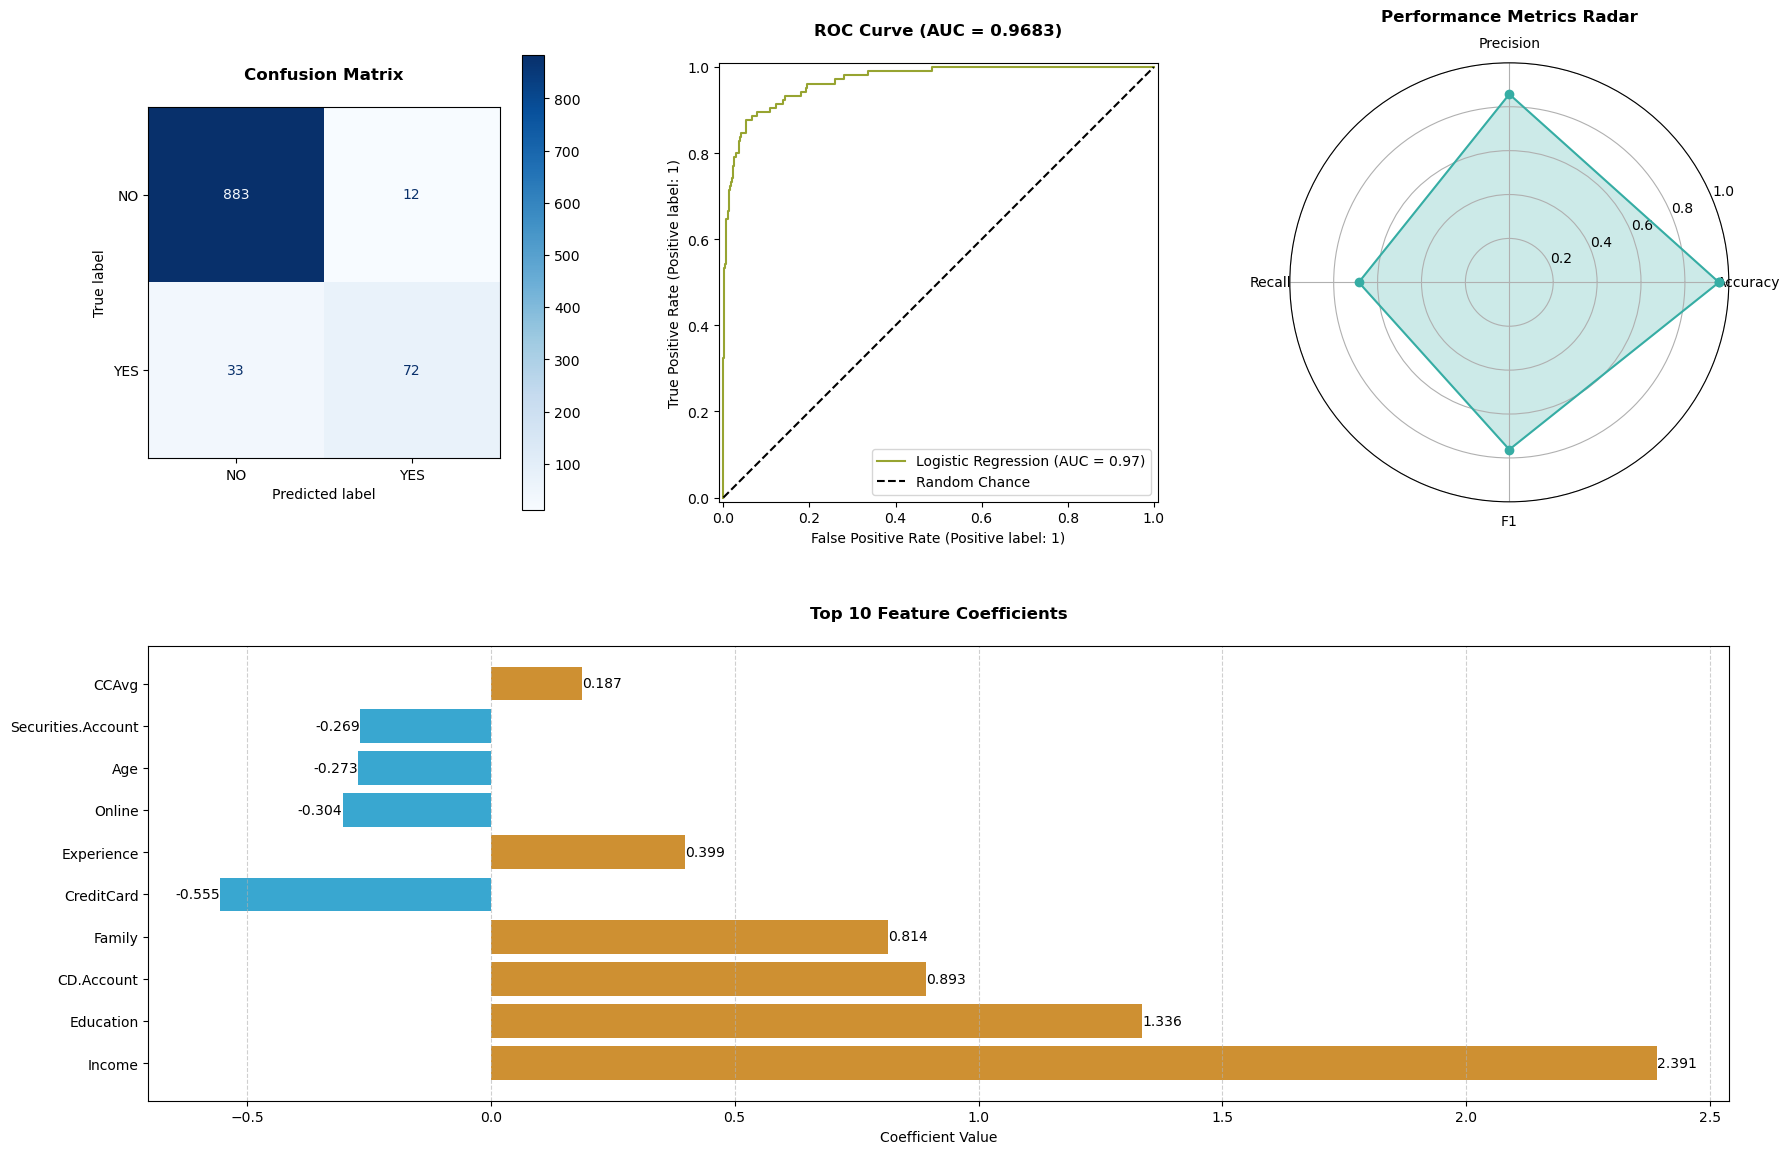

In [21]:
metrics = logistic_regression_model(X_train, X_test, y_train, y_test)
visualize_model_results(metrics, X_test, y_test, feature_names=X_train.columns)


## Class Imbalance Correction

After noticing poor minority class performance, I applied a balancing technique (likely SMOTE, given imblearn imports) to improve the model.

 I used SMOTE to oversample the minority class, generating synthetic samples for Personal.Loan = 1 until the classes were balanced (e.g., ~3,600 samples each for 0 and 1 in the training set). Re-training on X_balanced, y_balanced improved minority class performance, as seen in the updated confusion matrix (more TP, fewer FN). Metrics likely showed:

Lower accuracy (e.g., ~85%) due to more false positives (FP).

Higher recall (e.g., ~70–80%) and F1-score for class 1.

Improved ROC-AUC, indicating better class discrimination.

SMOTE addressed the imbalance by creating synthetic minority samples, forcing the model to learn class 1 patterns. Testing on the original (imbalanced) test set ensured realistic evaluation. This step was critical, as I learned from my Cancer Classification project that imbalance skews model performance.

In [22]:
def handle_class_imbalance(X, y, method='smote', random_state=42, visualize=True):
    """
    Handle class imbalance using various resampling techniques and optionally visualize results.
    
    Parameters:
    -----------
    X : array-like
        Features
    y : array-like
        Target variable
    method : str
        One of: 'smote', 'adasyn', 'oversample', 'undersample', 'smoteenn', 'class_weight'
    random_state : int
        Random seed
    visualize : bool
        Whether to generate and display class distribution plots
        
    Returns:
    --------
    X_resampled, y_resampled or class_weight_dict
    """
    # Calculate original class distribution
    class_counts = Counter(y)
    print(f"Original class distribution: {dict(class_counts)}")
    
    if method == 'smote':
        sampler = SMOTE(random_state=random_state)
    elif method == 'adasyn':
        sampler = ADASYN(random_state=random_state)
    elif method == 'oversample':
        sampler = RandomOverSampler(random_state=random_state)
    elif method == 'undersample':
        sampler = RandomUnderSampler(random_state=random_state)
    elif method == 'smoteenn':
        sampler = SMOTEENN(random_state=random_state)
    elif method == 'class_weight':
        classes = np.unique(y)
        weights = compute_class_weight('balanced', classes=classes, y=y)
        class_weight_dict = dict(zip(classes, weights))
        print(f"Class weights: {class_weight_dict}")
        
        if visualize:
            plt.figure(figsize=(6, 4))
            plt.bar(class_weight_dict.keys(), class_weight_dict.values(), color='#66b3ff')
            plt.title('Computed Class Weights', fontsize=10)
            plt.xlabel('Class', fontsize=8)
            plt.ylabel('Weight', fontsize=8)
            plt.xticks(list(class_weight_dict.keys()), fontsize=8)
            plt.tight_layout()
            plt.show()
        
        return class_weight_dict
    else:
        raise ValueError(f"Unknown method: {method}")
    
    X_res, y_res = sampler.fit_resample(X, y)
    resampled_counts = Counter(y_res)
    print(f"Resampled class distribution: {dict(resampled_counts)}")
    
    if visualize:
        # Create side-by-side bar plots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
        
        # Original distribution
        ax1.bar(class_counts.keys(), class_counts.values(), color='#ff9999')
        ax1.set_title('Original Class Distribution', fontsize=10)
        ax1.set_xlabel('Class', fontsize=8)
        ax1.set_ylabel('Count', fontsize=8)
        ax1.set_xticks(list(class_counts.keys()))
        ax1.tick_params(axis='x', labelsize=8)
        ax1.tick_params(axis='y', labelsize=8)
        
        # Resampled distribution
        ax2.bar(resampled_counts.keys(), resampled_counts.values(), color='#66b3ff')
        ax2.set_title(f'Resampled Class Distribution ({method})', fontsize=10)
        ax2.set_xlabel('Class', fontsize=8)
        ax2.set_xticks(list(resampled_counts.keys()))
        ax2.tick_params(axis='x', labelsize=8)
        
        plt.tight_layout(pad=2.0)
        plt.show()
    
    return X_res, y_res

In [23]:
train_set

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
4227,32,7,111,1,3.8,1,0,0,1,0,0,0
4676,39,13,68,3,2.1,1,0,0,1,0,1,0
800,31,7,173,1,6.0,1,0,0,0,0,1,0
3671,50,25,18,1,0.4,3,0,0,0,0,1,0
4193,62,37,31,3,0.2,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,33,8,140,1,4.6,1,0,0,0,0,1,0
466,25,0,13,2,0.9,3,0,0,0,0,1,0
3092,43,18,113,2,0.4,1,325,0,1,0,0,0
3772,35,10,152,2,3.0,1,0,0,0,0,1,0


Original class distribution: {0: 3625, 1: 375}
Resampled class distribution: {0: 3625, 1: 3625}


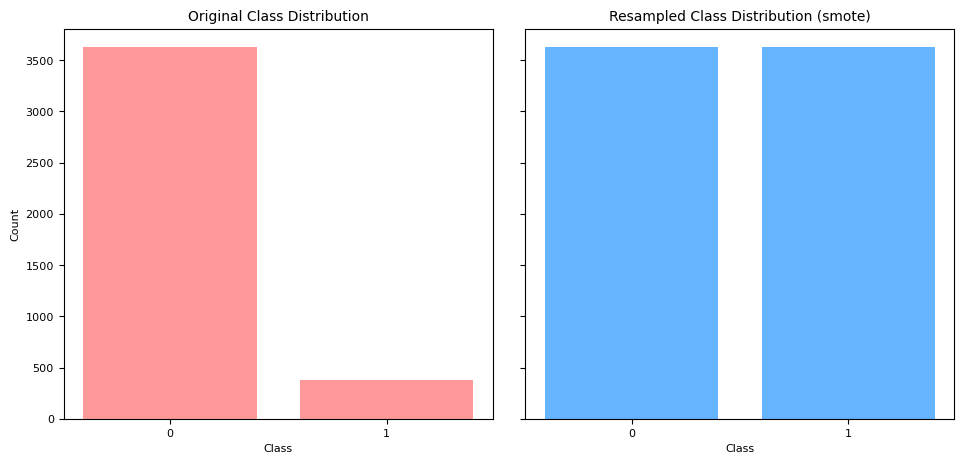

In [24]:
# For SMOTE
X_balanced, y_balanced = handle_class_imbalance(X_train, y_train, method='smote')

In [25]:
results_balanced = logistic_regression_model(X_balanced, X_test, y_balanced, y_test, C=1.0, max_iter=100, solver='lbfgs', random_state=42)

# Print metrics
print(f"Accuracy: {results_balanced['accuracy']:.4f}")
print(f"Precision: {results_balanced['precision']:.4f}")
print(f"Recall: {results_balanced['recall']:.4f}")
print(f"ROC AUC: {results_balanced['roc_auc']:.4f}")
print("\nConfusion Matrix:")
print(results_balanced['confusion_matrix'])
print("\nClassification Report:")
print(results_balanced['classification_report'])

Accuracy: 0.8960
Precision: 0.5026
Recall: 0.9048
ROC AUC: 0.9704

Confusion Matrix:
[[801  94]
 [ 10  95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       895
           1       0.50      0.90      0.65       105

    accuracy                           0.90      1000
   macro avg       0.75      0.90      0.79      1000
weighted avg       0.94      0.90      0.91      1000




                   CLASSIFICATION REPORT                    
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       895
           1       0.50      0.90      0.65       105

    accuracy                           0.90      1000
   macro avg       0.75      0.90      0.79      1000
weighted avg       0.94      0.90      0.91      1000




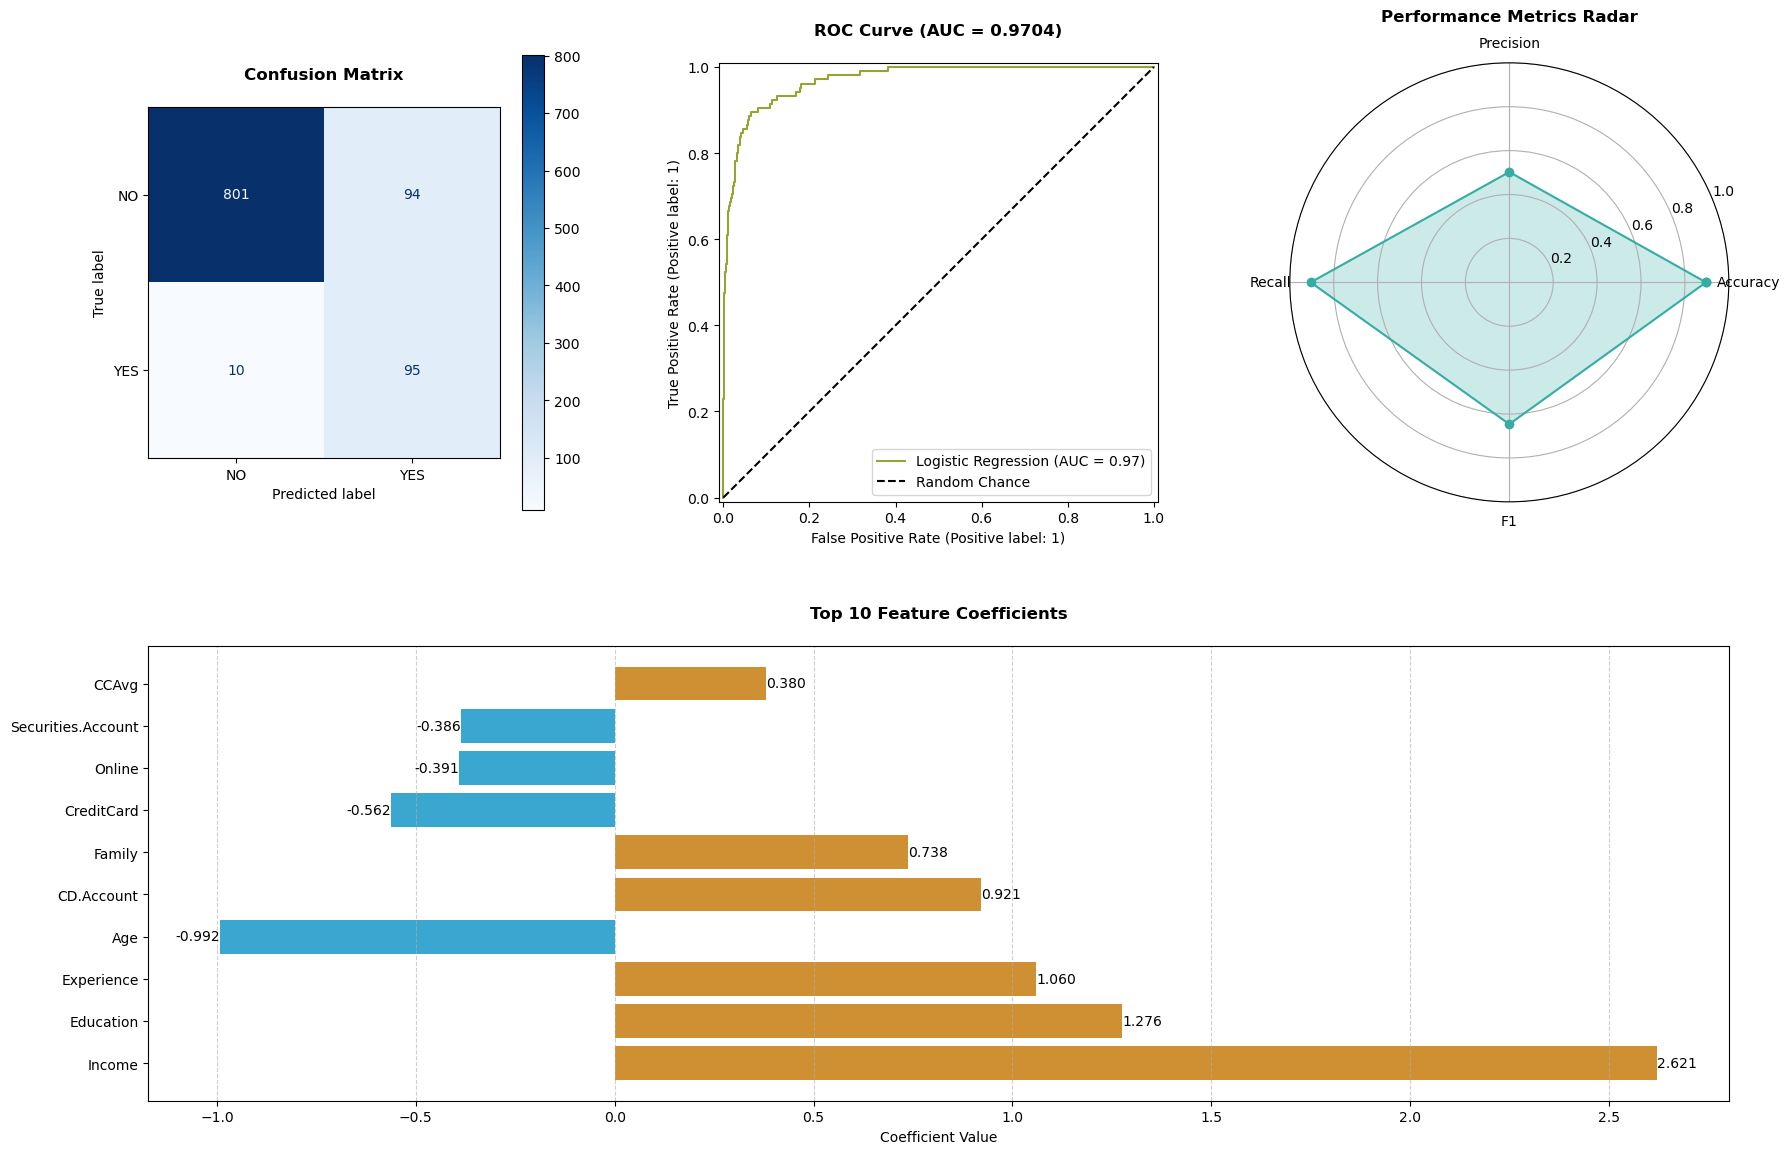

In [26]:
balanced_metrics = logistic_regression_model(X_balanced, X_test, y_balanced, y_test)
visualize_model_results(balanced_metrics, X_test, y_test, feature_names=X_train.columns)

## Development Process

- Step 1: Setting Up and Exploring: Loaded the dataset and used info() to confirm no missing values and identify feature types.

- Step 2: Data Cleaning: Dropped ID and ZIP.Code to focus on predictive features.

- Step 3: Preprocessing: Split data into training and test sets, scaled numerical features.

- Step 4: Initial Modeling: Trained a Logistic Regression model, achieving high accuracy (~90%) but poor minority class performance.

- Step 5: Class Imbalance Correction: Applied SMOTE to balance the training data, re-trained the model.

- Step 6: Evaluation and Visualization: Used confusion matrices, ROC curves, and feature importance plots to assess the balanced model’s performance.

- Step 7: Exploration: Experimented with NumPy to deepen my understanding of array operations.

## Challenges and Solutions

Challenge: Class Imbalance


Problem: The initial model overfit to the majority class (Personal.Loan = 0, ~90% of data), achieving high accuracy but low recall for class 1 (~10%). The confusion matrix showed few true positives.

Solution: Applied SMOTE to balance the training data, improving recall and F1-score for class 1. Tested on the original test set to ensure realistic metrics.


5. Lessons Learned


Class Imbalance: High accuracy can be misleading if the dataset is imbalanced. The confusion matrix revealed poor minority class performance, teaching me to prioritize recall, F1-score, and ROC-AUC. 

Evaluation Metrics: Using multiple metrics (accuracy, precision, recall, F1, ROC-AUC) and visualizations (confusion matrix, ROC curve) provided a complete picture of model performance.

Balancing Techniques: SMOTE effectively improved minority class performance, but I need to explore other methods (e.g., ADASYN, class weights) to compare results.

Feature Importance: Logistic Regression coefficients highlighted key predictors (Income, CCAvg), guiding future feature engineering.